In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_diabetes

In [ ]:
def get_X_y(features = None, verbose = False):
    X, y = load_diabetes(return_X_y = True)

    if features is None:
        print('Selecting all features')
    elif type(features) == int or (type(features) == list and len(features)==1):
        print('Selecting one feature: {}'.format(features))
        X= X[:,features].reshape(-1,1)
    elif type(features) == list: 
        print('Selecting features list: {}'.format(features))
        X= X[:,features]
    else: 
        print('wrong format of parameter "features"')
        return


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
    
    if verbose:
        print('X_train.shape= ',X_train.shape)
        print('y_train.shape= ',y_train.shape)
        print('X_train [:5] = \n{}'.format(X_train[:5]))
        print('y_train [:5] = \n{}'.format(y_train[:5]))
    return X_train, X_test, y_train, y_test

get_X_y()

Selecting all features


(array([[-0.06363517, -0.04464164, -0.03315126, ..., -0.00259226,
         -0.02251653, -0.05906719],
        [ 0.01264814, -0.04464164, -0.02560657, ..., -0.0763945 ,
         -0.07213275,  0.01134862],
        [ 0.03807591,  0.05068012,  0.00888341, ..., -0.00259226,
         -0.01811369,  0.00720652],
        ...,
        [-0.02730979, -0.04464164, -0.06332999, ..., -0.0763945 ,
         -0.0561531 , -0.06735141],
        [ 0.03081083,  0.05068012,  0.05954058, ..., -0.00259226,
         -0.02479543, -0.01764613],
        [ 0.04897352,  0.05068012,  0.05846277, ...,  0.03430886,
          0.02200407,  0.02791705]], shape=(331, 10)),
 array([[ 0.03444337, -0.04464164, -0.00728377, ..., -0.03949338,
         -0.02139531,  0.00720652],
        [-0.00914709, -0.04464164,  0.03798434, ...,  0.0158583 ,
         -0.00514219,  0.02791705],
        [ 0.00538306,  0.05068012, -0.00189471, ..., -0.00259226,
          0.03839393, -0.01350402],
        ...,
        [-0.05637009,  0.05068012, -0

Selecting one feature: 5
X_train.shape=  (331, 1)
y_train.shape=  (331,)
X_train [:5] = 
[[ 0.02405115]
 [-0.04515466]
 [-0.02104223]
 [ 0.0644473 ]
 [-0.0570543 ]]
y_train [:5] = 
[214.  98. 127. 233. 168.]


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='target', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='target', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='target', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>,
        <Axes: xlabel='target', ylabel='3'>],
       [<Axes: xlabel='0', ylabel='target'>,
        <Axes: xlabel='1', ylabel='target'>,
        <Axes: xlabel='2', ylabel='target'>,
        <Axes: xlabel='3', ylabel='target'>,
        <Axes: xlabel='target', ylabel='target'>]], dtype=ob

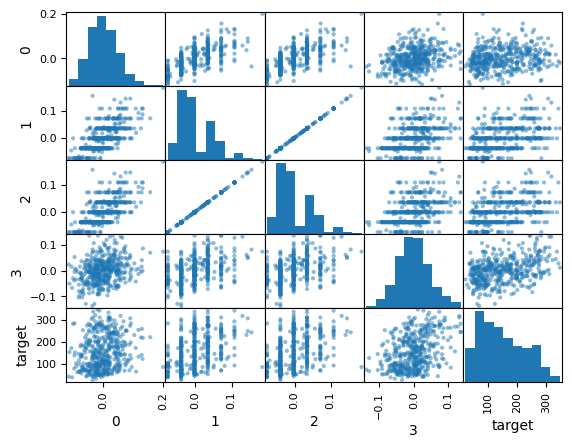

In [ ]:
import matplotlib as plt
X_train, X_test, y_train, y_test = get_X_y(5, verbose= True)

X, y = load_diabetes(return_X_y=True)
X= X[:,[5,7,-3,-1]]
df = pd.DataFrame (X)
df['target'] = y
pd.plotting.scatter_matrix(df)

In [ ]:
X_train, X_test, y_train, y_test = get_X_y(verbose= True)

Selecting all features
X_train.shape=  (331, 10)
y_train.shape=  (331,)
X_train [:5] = 
[[-0.06363517 -0.04464164 -0.03315126 -0.03321323  0.00118295  0.02405115
  -0.02499266 -0.00259226 -0.02251653 -0.05906719]
 [ 0.01264814 -0.04464164 -0.02560657 -0.04009893 -0.03046397 -0.04515466
   0.0780932  -0.0763945  -0.07213275  0.01134862]
 [ 0.03807591  0.05068012  0.00888341  0.04252949 -0.04284755 -0.02104223
  -0.03971921 -0.00259226 -0.01811369  0.00720652]
 [-0.07816532  0.05068012  0.07786339  0.05285804  0.07823631  0.0644473
   0.02655027 -0.00259226  0.04067283 -0.00936191]
 [-0.07453279 -0.04464164 -0.0105172  -0.00567042 -0.06623874 -0.0570543
  -0.00290283 -0.03949338 -0.04257085 -0.0010777 ]]
y_train [:5] = 
[214.  98. 127. 233. 168.]


In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
regressor = lin_reg
print('Linear Regression')
print('R2 train score =', regressor.score(X_train, y_train))
print('R2 test score =', regressor.score(X_test, y_test))
print('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Linear Regression
R2 train score = 0.5073693366380001
R2 test score = 0.5281729599217632
b: 148.9929089824379, 
w= [ -19.6849459  -240.17712443  557.92071086  251.49875073 -500.35528341
  275.55002947  -11.62872458  154.0055582   651.15320811   77.51418657]


In [77]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
regressor = ridge_reg
print('Ridge Redression')
print('R2 train score = ', regressor.score(X_train, y_train))
print('R2 test score = ', regressor.score(X_test, y_test))
print('b: {}, \nw = {}'.format(regressor.intercept_, regressor.coef_))

Ridge Redression
R2 train score =  0.42274917339301743
R2 test score =  0.4342973225973644
b: 148.99989270370446, 
w = [  31.07148535  -67.8120157   284.12144626  158.3077359    25.34329106
  -14.63150099 -130.28719404  116.41304414  239.50188481  108.52469397]


In [78]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
regressor = lasso_reg
print ('Lasso')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw = {}'.format(regressor.intercept_, regressor.coef_)) 

Lasso
R2 train score = 0.36601908968194896
R2 test score = 0.33920924807921515
b: 149.48529539341314, 
w = [  0.          -0.         379.30812187   0.           0.
   0.          -0.           0.         317.42349078   0.        ]


In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
X_train, X_test, y_train, y_test = get_X_y()

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X train shape = ', X_test.shape)
print('X train poly shape = ', X_train_poly.shape)

poly_lin_reg = LinearRegression().fit(X_train_poly, y_train)
regressor = poly_lin_reg
print('Polynomial + Linear Regression')
print('R2 train score =', regressor.score(X_train_poly, y_train))
print('R2 test score =', regressor.score(X_test_poly, y_test))
print('b: {}, \nw  = {}'.format(regressor.intercept_, regressor.coef_)) 

Selecting all features
X train shape =  (111, 10)
X train poly shape =  (331, 65)
Polynomial + Linear Regression
R2 train score = 0.6207810962295996
R2 test score = 0.3472243986719058
b: 55.74564209006542, 
w  = [ 1.06137498e+02 -2.77244219e+02  5.11354358e+02  2.51478306e+02
 -1.82518302e+04  1.59323845e+04  6.66445690e+03  1.74014774e+02
  6.57536398e+03  9.66610282e+01  2.78325334e+03  3.85281468e+03
 -1.53395915e+02  9.33380694e+02  7.84255464e+03 -1.10762461e+04
 -1.11174456e+03  2.01277652e+03  1.35040875e+03 -1.10327017e+03
 -1.67413427e+00  2.29828166e+03  2.55277891e+02 -6.62033960e+02
  1.81130613e+03  1.37538779e+02 -6.93403727e+03  1.68439720e+03
  1.60179356e+03  1.15224299e+03  3.13930733e+03 -8.23706391e+02
  6.06446052e+02  9.05587243e+02 -1.25957240e+03  3.92326702e+02
  7.84474860e+02 -3.72762355e+02  1.50641940e+04 -1.23251806e+04
 -3.94541792e+03  3.05725415e+03 -5.21151753e+03 -2.22762962e+03
  8.83280542e+04 -1.14624080e+05 -7.24321258e+04 -3.63921143e+04
 -2.6408

In [79]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = get_X_y(verbose = False)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train.shape = ', X_train.shape)
print('X_train_poly.shape = ', X_train_poly.shape)

scaler= StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

poly_lin_reg = LinearRegression().fit (X_train_poly_scaled, y_train)
regressor = poly_lin_reg
print('Polynomial + Normalization + Linear Regression')
print('R2 train score =', regressor.score(X_train_poly_scaled, y_train))
print('R2 test score =', regressor.score(X_test_poly_scaled, y_test))
print('b: {}, \nw = {}'.format(regressor.intercept_, regressor.coef_))

Selecting all features
X_train.shape =  (331, 10)
X_train_poly.shape =  (331, 65)
Polynomial + Normalization + Linear Regression
R2 train score = 0.6207810962295992
R2 test score = 0.34722439867189936
b: 149.9879154078546, 
w = [ 4.97209636e+00 -6.60344284e+00  2.47052564e+01  1.18567337e+01
 -8.69285293e+02  7.62552719e+02  3.03949992e+02  8.27990802e+00
  3.15136754e+02  4.67197571e+00  7.05699774e+00  8.45951234e+00
 -3.46047214e-01  1.82462614e+00  1.78065099e+01 -2.48564562e+01
 -2.20612038e+00  4.34202737e+00  3.00624056e+00 -2.25394841e+00
 -6.60344284e+00  5.25181416e+00  5.54568548e-01 -1.50418826e+00
  4.07990873e+00  2.69182131e-01 -1.46629636e+01  3.80570111e+00
  3.60014548e+00  4.05767524e+00  7.65968725e+00 -1.86034057e+00
  1.34692110e+00  1.89955976e+00 -2.87494869e+00  8.48179697e-01
  1.80720085e+00 -9.57457310e-01  3.16808467e+01 -2.54562864e+01
 -8.44481390e+00  6.46083198e+00 -1.12581646e+01 -5.35634696e+00
  2.96705759e+02 -3.96321205e+02 -1.54554648e+02 -1.00834

In [80]:
X_train, X_test, y_train, y_test = get_X_y(verbose = False)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train.shape = ', X_train.shape)
print('X_train_poly.shape = ', X_train_poly.shape)

poly_ridge = Ridge(alpha = 1e5, max_iter = 100000).fit (X_train_poly,y_train) # Increased max-iter and alpha
regressor = poly_ridge
print ('Polynomial + Ridge')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))
w= regressor.coef_

Selecting all features
X_train.shape =  (331, 10)
X_train_poly.shape =  (331, 65)
Polynomial + Ridge
R2 train score = 2.1608413246609892e-05
R2 test score = -0.013150086416298556


In [65]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train.shape = ', X_train.shape)
print('X_train_poly.shape = ', X_train_poly.shape)

poly_ridge = Ridge(alpha = 5e10, max_iter = 100000).fit (X_train_poly,y_train) # Increased max-iter and alpha
regressor = poly_ridge
print ('Polynomial + Ridge')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))

X_train.shape =  (331, 10)
X_train_poly.shape =  (331, 285)
Polynomial + Ridge
R2 train score = 4.322475710694107e-11
R2 test score = -0.01317309394302435


In [81]:
X_train, X_test, y_train, y_test = get_X_y(verbose = False)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train.shape = ', X_train.shape)
print('X_train_poly.shape = ', X_train_poly.shape)

poly_lasso = Lasso(max_iter = 100000).fit(X_train_poly, y_train)
regressor = poly_lasso
print('Polynomial + Lasso')
print('R2 train score = ', regressor.score(X_train_poly, y_train))
print('R2 test score = ', regressor.score(X_test_poly, y_test))
w = regressor.coef_
print('b: {}, \nw = {}'.format(regressor.intercept_, w))
w_relevant = w[np.abs(w) > 1e2]
print('\nRelevant w = {}'.format(w_relevant))

Selecting all features
X_train.shape =  (331, 10)
X_train_poly.shape =  (331, 65)
Polynomial + Lasso
R2 train score =  0.36601908968194896
R2 test score =  0.33920924807921515
b: 149.48529539341314, 
w = [  0.          -0.         379.30812187   0.           0.
   0.          -0.           0.         317.42349078   0.
   0.           0.           0.           0.          -0.
  -0.          -0.           0.           0.           0.
  -0.           0.           0.           0.          -0.
   0.          -0.           0.           0.           0.
   0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.          -0.
   0.           0.           0.           0.           0.
  -0.          -0.          -0.           0.           0.
  -0.           0.          -0.          -0.           0.
  -0.          -0.           0.          -0.           0.
   0.           0.           0.           0.           0.        ]

Relevant w = [379.30812187 317.4

In [82]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train.shape = ', X_train.shape)
print('X_train_poly.shape = ', X_train_poly.shape)

poly_lasso = Lasso(alpha = 10, max_iter = 100000).fit(X_train_poly, y_train)
regressor = poly_lasso
print('Polynomial + Lasso')
print('R2 train score = ', regressor.score(X_train_poly, y_train))
print('R2 test score = ', regressor.score(X_test_poly, y_test))
w = regressor.coef_
# print('b: {}, \nw = {}'.format(regressor.intercept_, w))
w_relevant = w[np.abs(w) > 1e2]
print('\nRelevant w = {}'.format(w_relevant))

X_train.shape =  (331, 10)
X_train_poly.shape =  (331, 285)
Polynomial + Lasso
R2 train score =  0.0
R2 test score =  -0.01317309398904798

Relevant w = []
